In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('train1.csv')
data.head()

,Severity,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID
0,Minor_Damage_And_Injuries,49.223744,14,22,71.285324,0.272118,78.04,2,31335.476824,3,0.424352,7570
1,Minor_Damage_And_Injuries,62.465753,10,27,72.288058,0.423939,84.54,2,26024.711057,2,0.352350,12128
2,Significant_Damage_And_Fatalities,63.059361,13,16,66.362808,0.322604,78.86,7,39269.053927,3,0.003364,2181
3,Significant_Damage_And_Serious_Injuries,48.082192,11,9,74.703737,0.337029,81.79,3,42771.499200,1,0.211728,5946
4,Significant_Damage_And_Fatalities,26.484018,13,25,47.948952,0.541140,77.16,3,35509.228515,2,0.176883,9054


In [3]:
# checking if there is a null value in the dataset
check_1 = data.isnull().sum()
check_1

Severity                   0
Safety_Score               0
Days_Since_Inspection      0
Total_Safety_Complaints    0
Control_Metric             0
Turbulence_In_gforces      0
Cabin_Temperature          0
Accident_Type_Code         0
Max_Elevation              0
Violations                 0
Adverse_Weather_Metric     0
Accident_ID                0
dtype: int64

In [4]:
# checking for duplicates
check_2 = data.duplicated().sum()
check_2

0

In [5]:
# dropping that column
data.drop(['Accident_ID'], axis = 1, inplace = True)

# Data Analysis

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

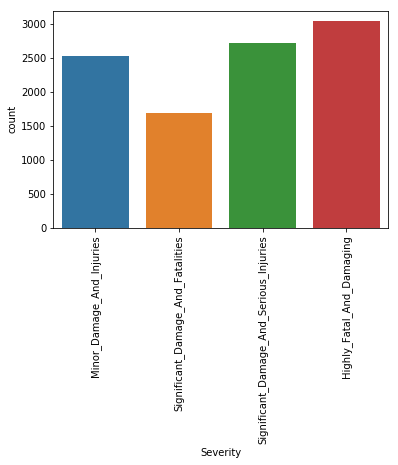

In [6]:
g = sns.countplot(data.Severity)
plt.xticks(rotation = 90)

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

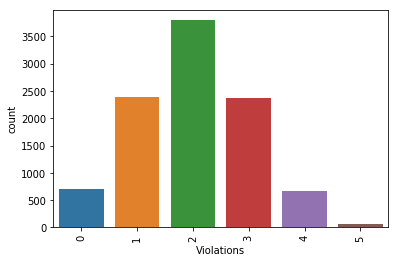

In [7]:
g = sns.countplot(data.Violations)
plt.xticks(rotation = 90)

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

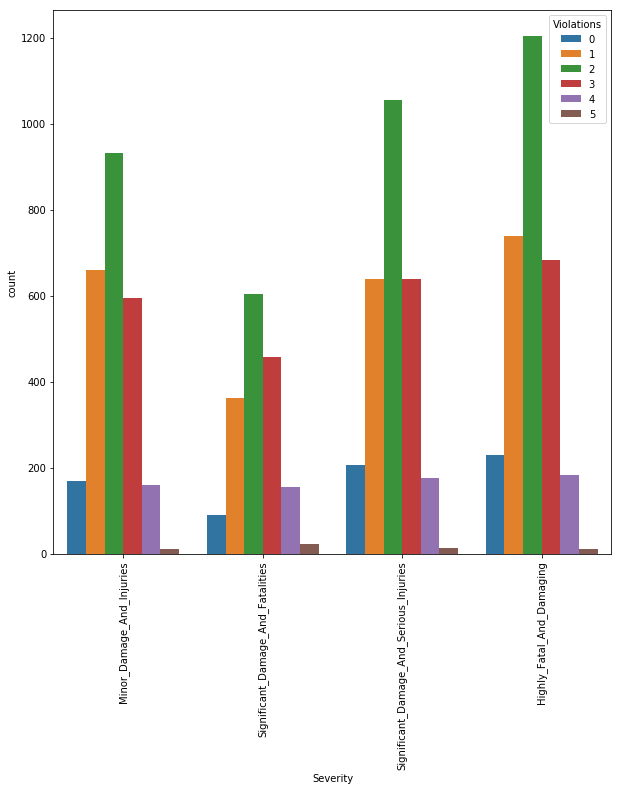

In [8]:
plt.figure(figsize=(10, 10))
sns.countplot(data.Severity,hue=data.Violations)
plt.xticks(rotation = 90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22]), <a list of 23 Text xticklabel objects>)

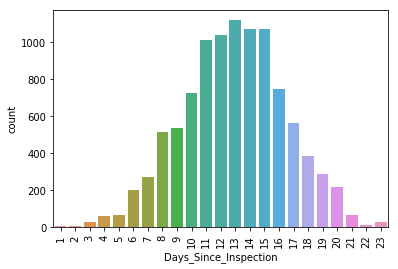

In [9]:
g = sns.countplot(data.Days_Since_Inspection)
plt.xticks(rotation = 90)

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

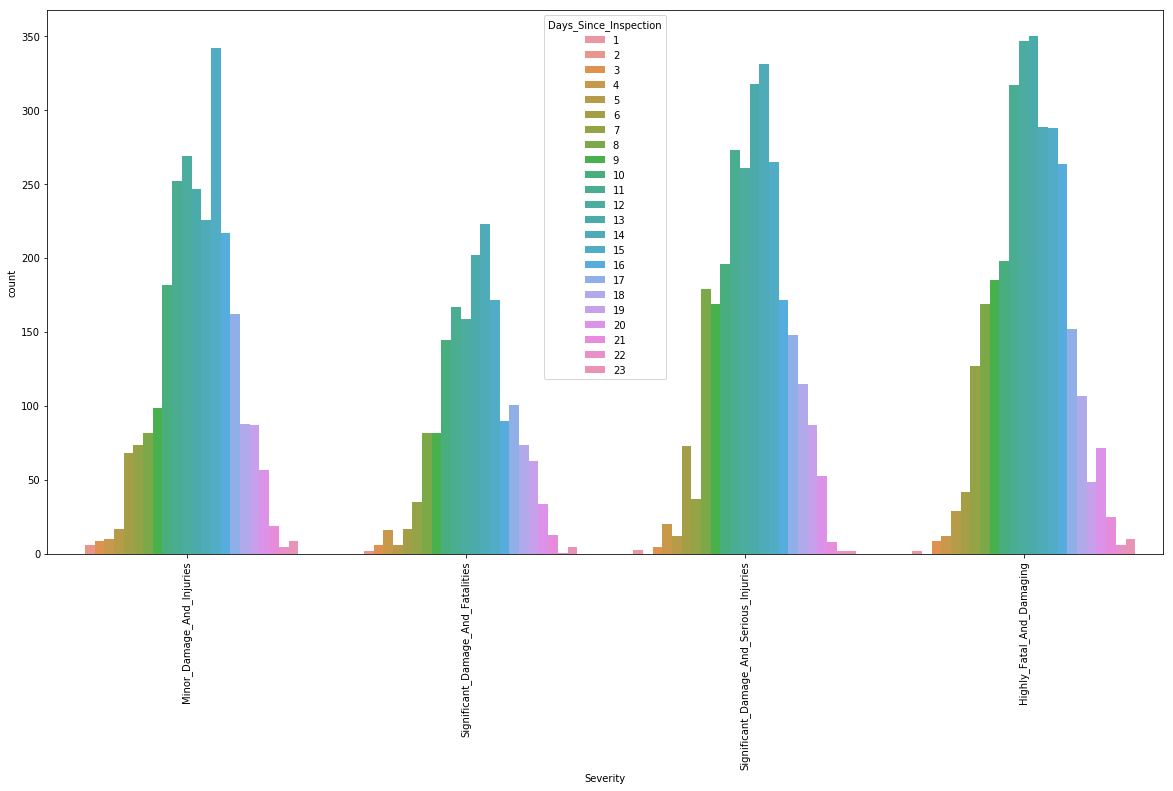

In [10]:
plt.figure(figsize=(20, 10))
sns.countplot(data.Severity,hue=data.Days_Since_Inspection)
plt.xticks(rotation = 90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43]),
 <a list of 44 Text xticklabel objects>)

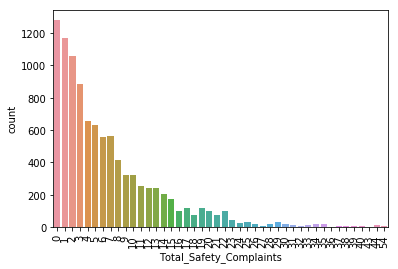

In [11]:
g = sns.countplot(data.Total_Safety_Complaints)
plt.xticks(rotation = 90)

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

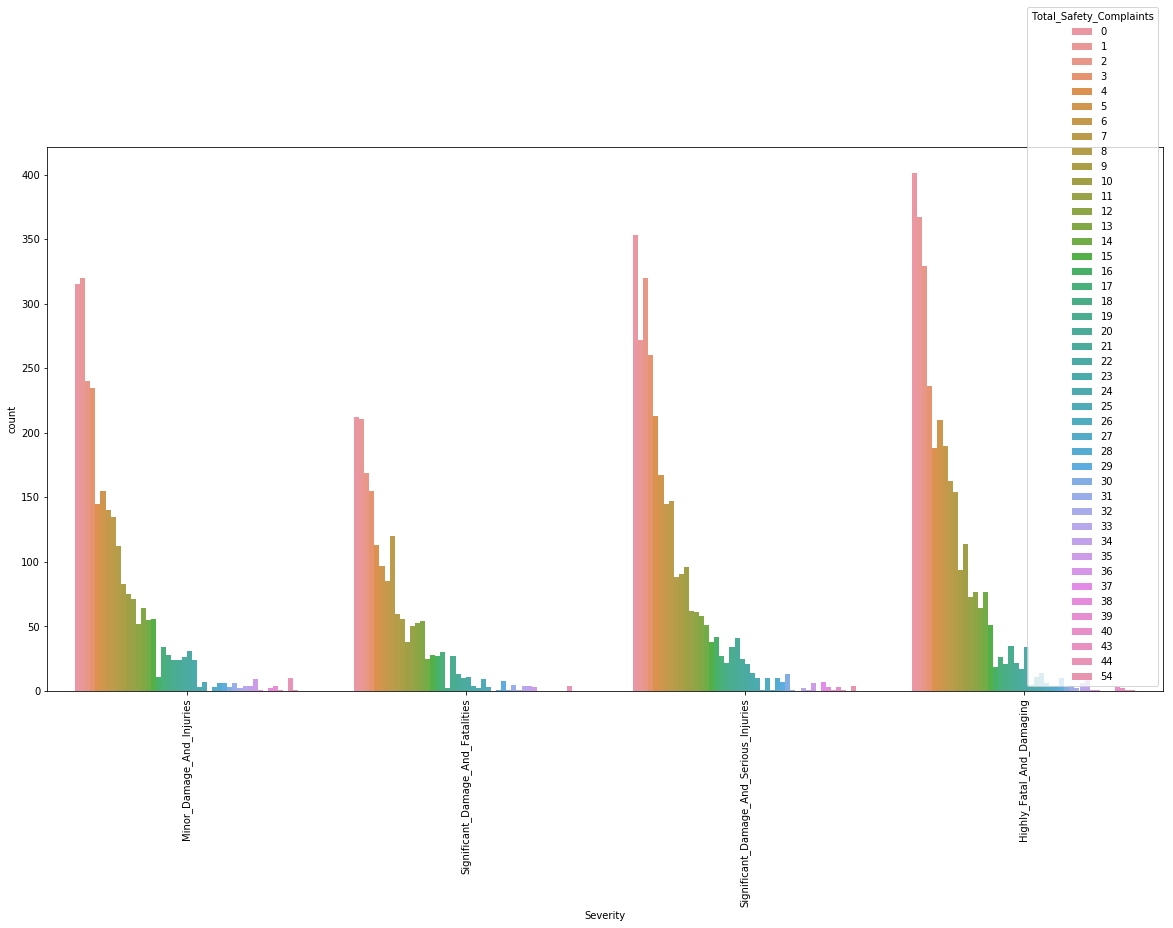

In [12]:
plt.figure(figsize=(20, 10))
sns.countplot(data.Severity,hue=data.Total_Safety_Complaints)
plt.xticks(rotation = 90)

([0, 1, 2, 3], <a list of 4 Text xticklabel objects>)

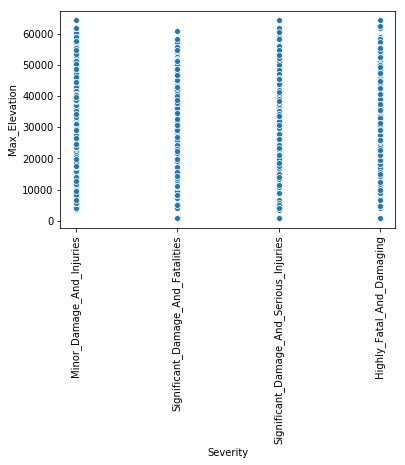

In [13]:
g = sns.scatterplot(x='Severity', y='Max_Elevation', data=data)
plt.xticks(rotation = 90)

([0, 1, 2, 3], <a list of 4 Text xticklabel objects>)

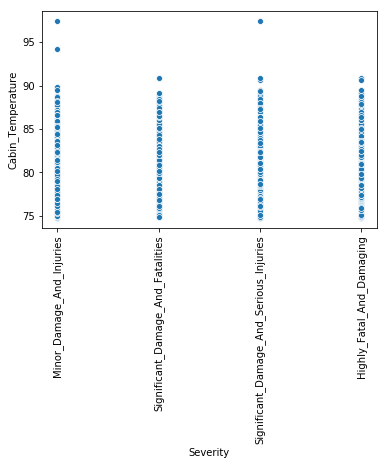

In [14]:
g = sns.scatterplot(x='Severity', y='Cabin_Temperature', data=data)
plt.xticks(rotation = 90)

([0, 1, 2, 3], <a list of 4 Text xticklabel objects>)

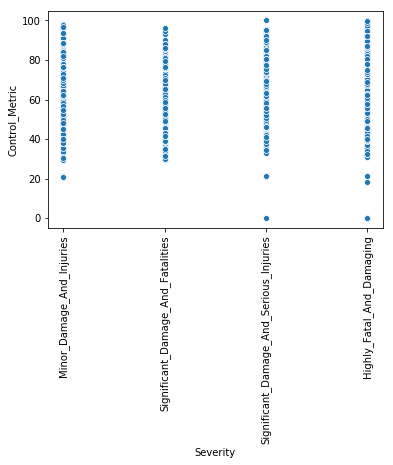

In [15]:
g = sns.scatterplot(x='Severity', y='Control_Metric', data=data)
plt.xticks(rotation = 90)

([0, 1, 2, 3], <a list of 4 Text xticklabel objects>)

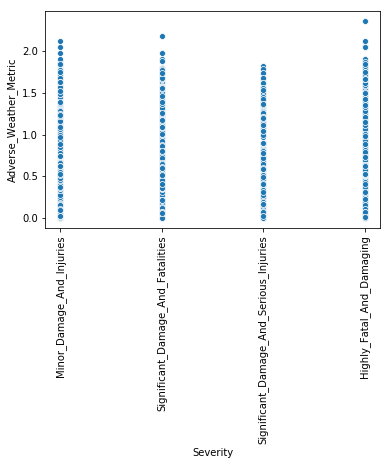

In [16]:
g = sns.scatterplot(x='Severity', y='Adverse_Weather_Metric', data=data)
plt.xticks(rotation = 90)

([0, 1, 2, 3], <a list of 4 Text xticklabel objects>)

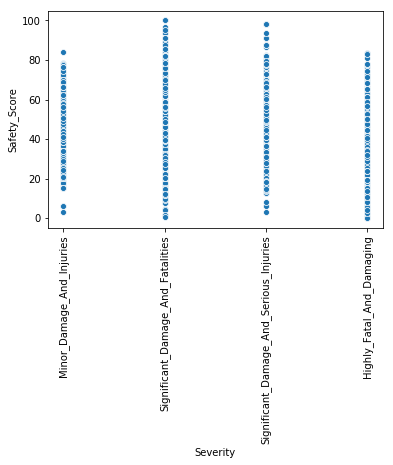

In [17]:
g = sns.scatterplot(x='Severity', y='Safety_Score', data=data)
plt.xticks(rotation = 90)

([0, 1, 2, 3], <a list of 4 Text xticklabel objects>)

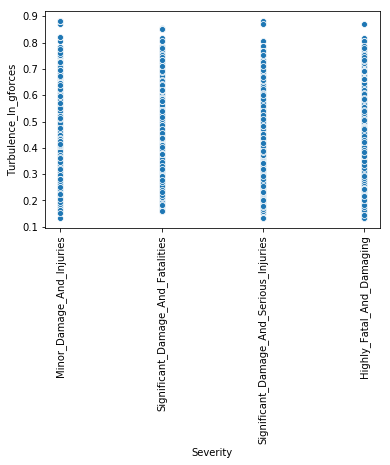

In [18]:
g = sns.scatterplot(x='Severity', y='Turbulence_In_gforces', data=data)
plt.xticks(rotation = 90)

# Predicting Using The random forest classifier

In [19]:
x = data.iloc[:,1:]
y = data.iloc[:,0]

In [20]:
from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.25, random_state = 0)

C:\Users\Kenechi\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [21]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 9, criterion= 'entropy' , random_state =0)
classifier.fit(x_train, y_train)


C:\Users\Kenechi\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=9, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [22]:
y_pred = classifier.predict(x_test)

In [23]:
from sklearn.metrics import classification_report
check = classification_report(y_test, y_pred)
print(check)

                                         precision    recall  f1-score   support

              Highly_Fatal_And_Damaging       0.89      0.93      0.91       754
              Minor_Damage_And_Injuries       0.88      0.91      0.89       627
      Significant_Damage_And_Fatalities       0.92      0.86      0.89       417
Significant_Damage_And_Serious_Injuries       0.94      0.90      0.92       702

                            avg / total       0.91      0.91      0.91      2500



In [24]:
test = pd.read_csv('test1.csv')
test.head()

,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID
0,19.497717,16,6,72.151322,0.388959,78.32,4,37949.724386,2,0.069692,1
1,58.173516,15,3,64.585232,0.250841,78.60,7,30194.805567,2,0.002777,10
2,33.287671,15,3,64.721969,0.336669,86.96,6,17572.925484,1,0.004316,14
3,3.287671,21,5,66.362808,0.421775,80.86,3,40209.186341,2,0.199990,17
4,10.867580,18,2,56.107566,0.313228,79.22,2,35495.525408,2,0.483696,21


In [25]:
test.drop(['Accident_ID'], axis = 1, inplace = True)

In [26]:
len(test)

2500

In [27]:
submit = pd.read_csv('sample_submission1.csv')
submit

,Accident_ID,Severity
0,1,Minor_Damage_And_Injuries
1,10,Highly_Fatal_And_Damaging
2,14,Highly_Fatal_And_Damaging
3,17,Significant_Damage_And_Serious_Injuries
4,21,Minor_Damage_And_Injuries
5,40,Highly_Fatal_And_Damaging
6,45,Highly_Fatal_And_Damaging
7,50,Significant_Damage_And_Fatalities
8,52,Highly_Fatal_And_Damaging
9,85,Minor_Damage_And_Injuries


In [28]:
length = len(submit)

In [29]:
submit['Severity'] = classifier.predict(test.iloc[:length])
submit

,Accident_ID,Severity
0,1,Highly_Fatal_And_Damaging
1,10,Significant_Damage_And_Fatalities
2,14,Significant_Damage_And_Serious_Injuries
3,17,Significant_Damage_And_Serious_Injuries
4,21,Significant_Damage_And_Fatalities
5,40,Significant_Damage_And_Fatalities
6,45,Significant_Damage_And_Fatalities
7,50,Highly_Fatal_And_Damaging
8,52,Highly_Fatal_And_Damaging
9,85,Significant_Damage_And_Serious_Injuries


In [30]:
submit.to_csv("predictions.csv", index=False)